In [2]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import Adam 
from keras.activations import relu

from keras.activations import softmax

from keras.losses import binary_crossentropy


from sklearn.metrics import accuracy_score


In [3]:

df = pd.read_csv('StudentsPerformance.csv')
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:

df.describe(include="object")



,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.select_dtypes(include=["int64"]).corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [9]:
gender = pd.get_dummies(df["gender"],dtype=int)

In [10]:
lunch = pd.get_dummies(df["lunch"],dtype=int)

In [11]:

df = df.drop(columns=["gender","lunch"])

In [12]:

# pd.concat([df,gender],axis=1)


In [13]:
df.isnull().sum()

race/ethnicity                 0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:


X,y = make_classification(n_samples=100,
                          n_features=2,
                          n_informative=1,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          class_sep=0.5,
                          random_state=42)
X.shape ,y.shape



((100, 2), (100,))

In [15]:
y 

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [16]:
X

array([[-0.01759094,  0.47383292],
       [-0.21508153, -0.03471177],
       [ 0.78804649,  0.71400049],
       [ 0.44900079,  0.62566735],
       [ 0.79443245, -0.44651495],
       [ 0.77886873, -0.07282891],
       [-0.46132573,  0.17457781],
       [-0.55190674,  0.75193303],
       [-0.58204625, -0.34271452],
       [ 0.31987919, -0.68002472],
       [ 0.33542098,  0.05820872],
       [ 0.44604581,  0.21409374],
       [-0.17630562, -1.23086432],
       [-0.4234536 ,  0.06023021],
       [-0.28061289,  0.22745993],
       [-0.80595559,  0.47359243],
       [-0.60698389, -0.16128571],
       [ 0.87622267,  0.29307247],
       [ 0.49715802,  0.35778736],
       [ 0.29900835, -0.88951443],
       [ 1.60465976, -0.85715756],
       [-0.03835775, -1.24573878],
       [-0.20878456,  0.34644821],
       [-0.52830627,  0.18463386],
       [ 0.63037986,  0.56078453],
       [-0.25377702,  1.89679298],
       [ 0.76631756,  1.15859558],
       [ 0.96642399, -1.1913035 ],
       [-0.75157102,

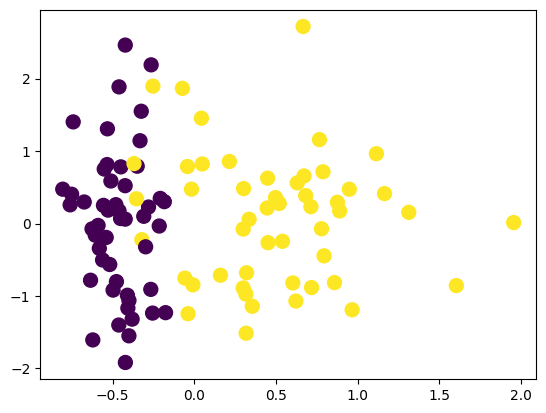

In [17]:

plt.scatter(x=X[:,0],y=X[:,1],c=y,s=100)
plt.show()


In [18]:

model = Sequential()
model.add(Dense(units=4,input_dim=2,activation=relu))
model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))



d:\AI mid\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((80, 2), (20, 2), (80,), (20,))

In [21]:

X_train.dtype


dtype('float64')

In [22]:


X_train = tf.convert_to_tensor(X_train,tf.float32)
X_test = tf.convert_to_tensor(X_test,tf.float32)
y_train = tf.convert_to_tensor(y_train,tf.float32)
y_test = tf.convert_to_tensor(y_test,tf.float32)


In [23]:
X_train.dtype

tf.float32

In [24]:


model.compile(optimizer=Adam(learning_rate=0.001),loss=binary_crossentropy,metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,shuffle=True)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4125 - loss: 0.7613
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4250 - loss: 0.7583
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4250 - loss: 0.7557
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4250 - loss: 0.7532
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4250 - loss: 0.7508
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4375 - loss: 0.7481
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4375 - loss: 0.7460
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4375 - loss: 0.7434 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4375 - loss: 0.7411
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4375 - loss: 0.7388
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4375 - loss: 0.7366
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4375 - l

In [25]:
y_test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1.], dtype=float32)>

In [26]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


array([[0.5272573 ],
       [0.4634591 ],
       [0.4901087 ],
       [0.3829585 ],
       [0.7790534 ],
       [0.51508355],
       [0.51105267],
       [0.70545924],
       [0.61502504],
       [0.5586274 ],
       [0.6607845 ],
       [0.4901087 ],
       [0.6586213 ],
       [0.7523304 ],
       [0.49839383],
       [0.6316676 ],
       [0.4901087 ],
       [0.4901087 ],
       [0.43018395],
       [0.5112734 ]], dtype=float32)

In [27]:

y_pred = np.where(y_pred > 0.5, 1, 0)


In [28]:
y_pred

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [29]:
y_test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1.], dtype=float32)>

In [30]:
accuracy_score(y_test,y_pred)*100

80.0